In [0]:
#Import all needed libraries for this project
import numpy as np
import pandas as pd
import time

from sklearn.preprocessing import StandardScaler 
#from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [0]:
#Sample datasets are already imported as presented by Xavier_Torres
df = pd.read_csv('Model_Data_v3.csv')

In [9]:
df.columns

Index(['country', 'year', 'inflation_annual_percent',
       'hdi_human_development_index',
       'Population_living_below_income_poverty_line,_national_poverty_line(%)',
       'population_growth_annual_percent', 'school_enrolment_tertiary',
       'total_health_spending_percent_of_gdp', 'wage_and_salaried_worker',
       'expenditure_on_tertiary_institution_%Gov_Exp_on_Edutn',
       'gdp_total_yearly_growth',
       'Government expenditure on education (% of GDP)_HDI',
       'government_expenditure_per_student, tertiary_%GDP',
       'government_health_spending_of_total_gov_spending_percent'],
      dtype='object')

In [0]:
y = df['Government expenditure on education (% of GDP)_HDI']
x = df = df.drop(columns=['country','year','hdi_human_development_index'])

In [0]:
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=30, shuffle=True)


In [0]:
#NeXt Step is to Scale features by standardizing
sf = StandardScaler()
X_train = sf.fit_transform(X_train)
X_test = sf.transform(X_test)

In [0]:
#Training the algorithm with the sample dataset
estModel = RandomForestRegressor(n_estimators = 300, random_state = 5)
estModel.fit(X_train, Y_train)
#Model Score
mScore = estModel.score(X_train,Y_train)

#Prediction
Predict_Y = estModel.predict(X_test)

In [14]:
#Evaluating algorithm performance
#MSE Result
rmse = mean_squared_error(Y_test,Predict_Y)
print('Root Mean Squared Error:, %.2f' % np.sqrt(rmse))
#Variance score: 1 is perfect prediction score
print('Test Variance Score: %.4f' % r2_score(Y_test, Predict_Y))
#Variance score: 1 is perfect prediction score
print('R^2 Prediction Score: %.4f'% mScore)

Root Mean Squared Error:, 0.05
Test Variance Score: 0.9328
R^2 Prediction Score: 0.9587


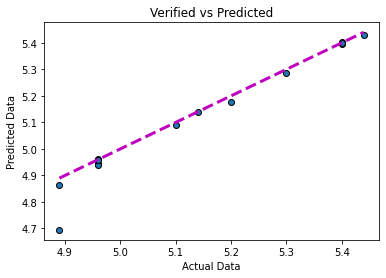

In [15]:
#Root Mean Squared Error
#mse = np.sqrt(np.mean((Y_test - Predict_Y)**2))
time.sleep(1)
#rint('Root Mean Square Error: %.4f'%rmse)
#Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(Y_test, Predict_Y, edgecolors=(0, 0, 0))
pX.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual Data')
pX.set_ylabel('Predicted Data')
pX.set_title("Verified vs Predicted")
plt.show()